In [5]:
import pandas as pd
import numpy as np
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from random import randint

%matplotlib inline

In [2]:
df = pd.read_csv('data.csv',index_col=0)
df

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,48,3,2,24.0,0,0,14,31,19,12,3,1,0,1
859,0,0,2,35.0,0,0,14,31,19,12,3,1,0,0
860,3,1,1,49.4,0,0,14,31,19,12,3,1,0,0
861,24,9,1,49.4,0,0,14,31,19,12,3,1,0,0


<AxesSubplot:>

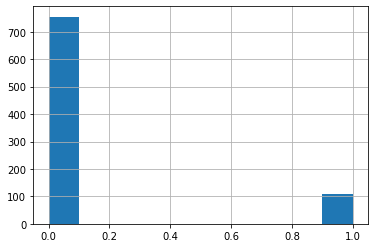

In [3]:
df['result'].hist()

<AxesSubplot:xlabel='gender', ylabel='count'>

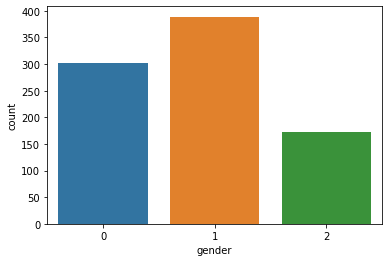

In [4]:
sns.countplot(x=df['gender'])

<AxesSubplot:>

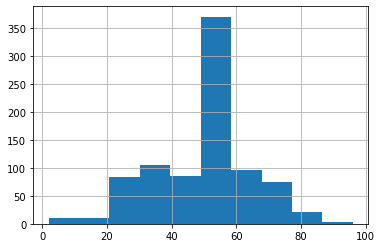

In [5]:
df.age.hist()

In [6]:
print(df.gender.value_counts())

1    389
0    302
2    172
Name: gender, dtype: int64


In [7]:
#df['gender'] = df['gender'].mask(df['gender'] == 2, 1)
#len(df)
for i in range(len(df)):
    df.iloc[i, 2] = randint(0, 1) if df.iloc[i, 2] == 2 else df.iloc[i, 2]
         #df['gender']



In [8]:
df['gender'].value_counts()

1    471
0    392
Name: gender, dtype: int64

In [9]:
df['location'].unique()

array([104, 101, 137, 116,  23, 105,  13, 100, 135,  53,  71,  67,  29,
        35, 102,  83,  33,  42,  39,  52,  41,  54,  46,  31, 103, 132,
        47,  99,  40,  17,  88,  27,   6,   4, 109,  96,  25,  68,  79,
        76,  18,  70,  16,  82, 117,   1,  80,  44,  87,  75,  51,  64,
        37,  22, 128,  86,  56,  95,  97,  78,  30,  59,  60,  49,  77,
        32,  73, 106, 108,  98, 110, 114,  19,   8,  74, 131, 113,  38,
       115, 126, 127, 125,  92, 107, 118, 124,  90,  12,  28,   9, 120,
        85,  36,  93,  43, 121,  45, 133, 119,  58,  63,  62, 138,  26,
       130,  81,  94, 134,  69, 122,  84, 129,  57,   2,  89,  65, 112,
        11,  72,  20,   5, 123,  21, 136,  55,  14,   7,  91, 111,  34,
        50,  66,  61,  10,  48,   0,   3,  24,  15])

In [10]:
x = df[['location', 'country', 'gender', 'age', 'vis_wuhan', 'from_wuhan',
       'symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6',
       'diff_sym_hos']]
y = df['result']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1,shuffle=True, random_state=42)
print(np.shape(X_train))
print(np.shape(X_test))
print(np.shape(y_train))
print(np.shape(y_test))

(776, 13)
(87, 13)
(776,)
(87,)


In [11]:
dic = {'k':[], 'weights':[],'precision':[], 'recall':[], 'F1':[], 'roc_auc':[]}
weights = ['distance', 'uniform']
for k in range(1, int(len(X_train)**0.5), 2):
        for j in range(2):
            knn = KNeighborsClassifier(n_neighbors=k, weights=weights[j])
            knn.fit(X_train, y_train)
            y_predict = knn.predict(X_test)
            precision, recall = precision_score(y_test, y_predict), recall_score(y_test, y_predict)
            roc_auc = roc_auc_score(y_test, y_predict)
            F1 = 2 * (precision * recall) / (precision + recall)
            dic['weights'].append(weights[j])
            dic['k'].append(k)
            dic['precision'].append(precision)
            dic['recall'].append(recall)
            dic['F1'].append(F1)
            dic['roc_auc'].append(roc_auc)
print(y_predict)
print(np.asarray(y_test))
f = pd.DataFrame(dic)
#f
f[f['roc_auc'] == f['roc_auc'].max()]

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0]


,k,weights,precision,recall,F1,roc_auc
2,3,distance,0.9,0.9,0.9,0.943506
4,5,distance,0.9,0.9,0.9,0.943506
6,7,distance,0.9,0.9,0.9,0.943506
10,11,distance,0.9,0.9,0.9,0.943506


scaler = MinMaxScaler()
names = df.columns
result = scaler.fit_transform(df)
print(type(result))
df2 = {}
for i in range(14):
    df2[names[i]] = result[:,i]
print(type(df2))
df2 = pd.DataFrame(df2)
print(type(df2))

df2.head()

In [12]:
#scaler = MinMaxScaler()
#df['age'] = scaler.fit_transform(df['age'].to_numpy()[:,np.newaxis])[:,0]
#df

In [13]:
weights = {0:1,1:1.75}

dic = {'class_weight':[],'precision':[], 'recall':[], 'F1':[], 'roc_auc':[]}
for i in np.arange(1,2,0.05):
    for j in np.arange(0.05,1,0.05):
        weights[1] = i
        weights[0] = j
        logist = LogisticRegression(max_iter=10000,class_weight=weights)
        logist.fit(X_train,y_train)
        y_preds = logist.predict(X_test)
        precision, recall = precision_score(y_test, y_preds), recall_score(y_test, y_preds)
        roc_auc = roc_auc_score(y_test, y_preds)
        F1 = 2 * (precision * recall) / (precision + recall)
        #precision, recall, roc_auc, F1
        dic['class_weight'].append((j,i))
        dic['precision'].append(precision)
        dic['recall'].append(recall)
        dic['F1'].append(F1)
        dic['roc_auc'].append(roc_auc)
f = pd.DataFrame(dic)
f[f['F1'] == f['F1'].max()]

## Fresh start for my sanity


In [108]:
df = pd.read_csv('data.csv',index_col=0)

In [109]:
for i in range(len(df)):
    df.iloc[i, 12] = df.iloc[i,12]*-1 if df.iloc[i, 12] < 0 else df.iloc[i, 12]
df['gender'] = df['gender'].mask(df['gender'] == 2, 1)

In [110]:
columns = ['symptom1', 'symptom2', 'symptom3', 'symptom4', 'symptom5', 'symptom6', 'location', 'country']
df_new = df.copy()
for i in columns:
    encoding = pd.get_dummies(df[i], prefix=i)
    df_new = df_new.join(encoding)
    df_new.drop(i, axis=1, inplace=True)
df_new

,gender,age,vis_wuhan,from_wuhan,diff_sym_hos,result,symptom1_0,symptom1_1,symptom1_2,symptom1_3,...,country_24,country_25,country_26,country_27,country_28,country_29,country_30,country_31,country_32,country_33
0,1,66.0,1,0,8,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,56.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,46.0,0,1,13,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,60.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,58.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
858,1,24.0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
859,1,35.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
860,1,49.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
861,1,49.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
df_new.drop(columns=['symptom1_0','symptom2_0','symptom3_0','symptom4_0','symptom5_0','symptom6_0','country_0','location_0'],inplace=True)
scaler = MinMaxScaler()
#df_new['age'] = scaler.fit_transform(df_new['age' ].to_numpy()[:,np.newaxis])[:,0]
df_new['diff_sym_hos'] = scaler.fit_transform(df_new['diff_sym_hos'].to_numpy()[:,np.newaxis])[:,0]

In [112]:
x = df_new.drop('result', axis=1)
y = df_new['result']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5,shuffle=True, random_state=42)

In [113]:
logist = LogisticRegression(max_iter=10000, random_state = 42)
# logist.fit(X_train,y_train)
# y_preds = logist.predict(X_test)
# precision, recall = precision_score(y_test, y_preds,average=None), recall_score(y_test, y_preds,average=None)
# roc_auc = roc_auc_score(y_test, y_preds)
# F1 = f1_score(y_test.values, y_preds)
# precision, recall, roc_auc, F1

In [114]:
params_dict = {}
params_dict['class_weight'] = []

for i in np.arange(0.01,1,0.05):
    params_dict['class_weight'].append((1-i,i))

params_dict['class_weight'].append('balanced')
    
parameters = [params_dict]
grid_search = GridSearchCV(logist, parameters, scoring='recall', cv=5)
best_logist = grid_search.fit(X_train, y_train)
y_predict = best_logist.predict(X_val)
precision= precision_score(y_val, y_predict,average=None)
recall = recall_score(y_val,y_predict,average=None)
roc_auc = roc_auc_score(y_val, y_predict)
F1 = f1_score(y_val, y_predict)
print(best_logist.best_estimator_)
precision, recall, F1, roc_auc

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)


(array([1. , 0.6]),
 array([0.92207792, 1.        ]),
 0.7499999999999999,
 0.961038961038961)

In [115]:
X_train = pd.concat([X_train,X_val])
y_train = pd.concat([y_train,y_val])
X_test = X_test.iloc[:-1]
y_test = y_test.iloc[:-1]

In [116]:
logist = best_logist.best_estimator_
logist.fit(X_train,y_train)
y_predict = logist.predict(X_test)
precision= precision_score(y_test, y_predict,average=None)
recall = recall_score(y_test,y_predict,average=None)
roc_auc = roc_auc_score(y_test, y_predict)
F1 = f1_score(y_test, y_predict)
precision, recall, F1, roc_auc

(array([0.97014925, 0.73684211]),
 array([0.92857143, 0.875     ]),
 0.7999999999999999,
 0.9017857142857143)

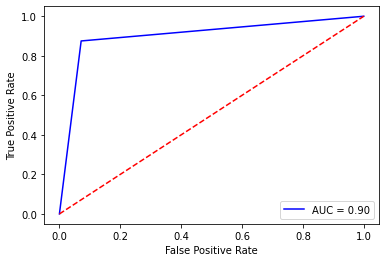

In [117]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0, 1])
# plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()